In [1]:
!pip install nptdms

In [2]:
from nptdms import TdmsFile
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import numpy as np

multipliers = {
    'p': 1e-12,
    'n': 1e-9,
    'u': 1e-6,
    'm': 1e-3,
    'k': 1e3,
    'M': 1e6,
    'G': 1e9,
    '':1
}

def TDMS_File(file_path):
    tdms_file = TdmsFile.read(file_path)

    Groups_DataFrame = []

    for group in tdms_file.groups():
        
        Groups_DataFrame.append(tdms_file[group.name].as_dataframe())
        print(group.name)
    
    return Groups_DataFrame

def convert(valor):
    if isinstance(valor, str):
        valor = valor.replace(',', '.')
        for sufijo, mult in multipliers.items():
            if valor.endswith(sufijo):
                try:
                    return float(valor.replace(sufijo, '')) * mult
                except:
                    return None
    return valor

def Excel_File(file_path):
    df = pd.read_excel(file_path)
    for col in df.columns:
        df[col] = df[col].map(convert)
    return df

COHERENTE

In [5]:
LASER_G2_2US = Excel_File("LASER_G2_2US.xlsx")
LASER_G2 = Excel_File("LASER_G2.xlsx")
LASER_RATES = Excel_File("LASER_RATES.xlsx")
LASER_SSH = Excel_File("LASER_SSH.xlsx")

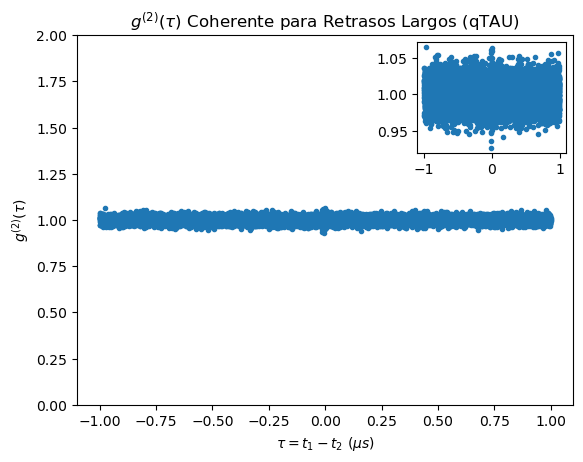

In [6]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Crear figura y eje principal
fig, ax = plt.subplots()

# Gráfico principal
ax.scatter(
    LASER_G2_2US["tau (s) - HBT Measurement"]*1e6,
    LASER_G2_2US["g^(2)(tau) - HBT Measurement"],
    marker="."
)
ax.set_ylim(0, 2)
ax.set_xlabel(r"$\tau = t_1 - t_2\ (\mu s)$")
ax.set_ylabel(r"$g^{(2)}(\tau)$")

# Crear eje insertado (inset)
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right')

# Gráfico dentro del gráfico
ax_inset.scatter(
    LASER_G2_2US["tau (s) - HBT Measurement"]*1e6,
    LASER_G2_2US["g^(2)(tau) - HBT Measurement"],
    marker="."
)

ax.set_title(r"$g^{(2)}(\tau)$ Coherente para Retrasos Largos (qTAU)")

plt.savefig("Coherente_para_Retrasos_Largos_(qTAU).png",format="png")
plt.show()

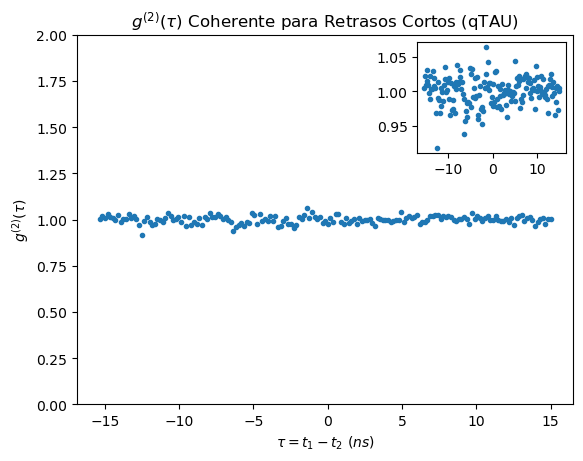

In [7]:
# Crear figura y eje principal
fig, ax = plt.subplots()

# Gráfico principal
ax.scatter(
    LASER_G2["tau (s) - HBT Measurement"]*1e9,
    LASER_G2["g^(2)(tau) - HBT Measurement"],
    marker="."
)
ax.set_ylim(0, 2)
ax.set_xlabel(r"$\tau = t_1 - t_2\ (ns)$")
ax.set_ylabel(r"$g^{(2)}(\tau)$")

# Crear eje insertado (inset)
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right')

# Gráfico dentro del gráfico
ax_inset.scatter(
    LASER_G2["tau (s) - HBT Measurement"]*1e9,
    LASER_G2["g^(2)(tau) - HBT Measurement"],
    marker="."
)

ax.set_title(r"$g^{(2)}(\tau)$ Coherente para Retrasos Cortos (qTAU)")
plt.savefig("Coherente_para_Retrasos_Cortos_(qTAU).png",format="png")
plt.show()

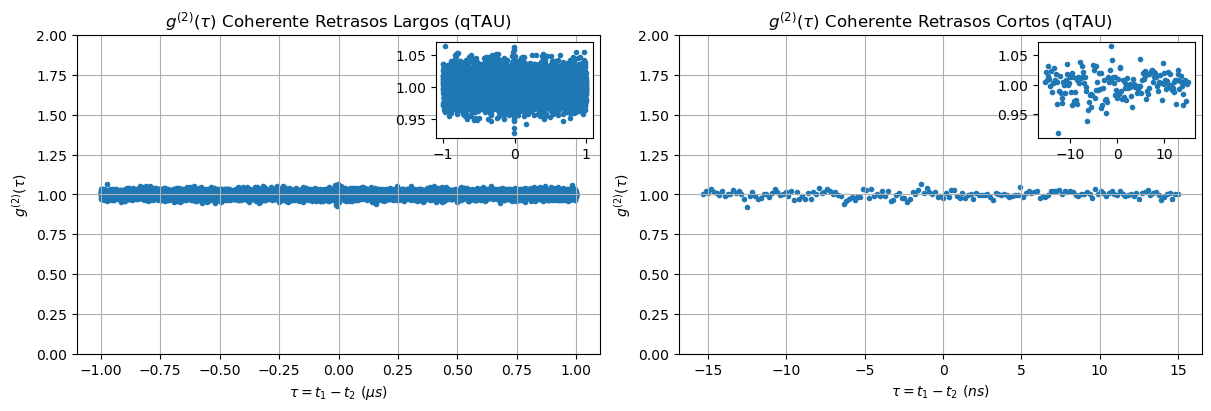

In [109]:
# Crear figura con dos subgráficos (uno al lado del otro)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)  # Ligero aumento de altura

# Primer gráfico (Retrasos largos)
ax1.scatter(
    LASER_G2_2US["tau (s) - HBT Measurement"] * 1e6,
    LASER_G2_2US["g^(2)(tau) - HBT Measurement"],
    marker="."
)
ax1.set_ylim(0, 2)
ax1.set_xlabel(r"$\tau = t_1 - t_2\ (\mu s)$")
ax1.set_ylabel(r"$g^{(2)}(\tau)$")
ax1.set_title(r"$g^{(2)}(\tau)$ Coherente Retrasos Largos (qTAU)")
ax1.grid(True)

# Crear eje insertado para el primer gráfico
ax_inset1 = inset_axes(ax1, width="30%", height="30%", loc='upper right')
ax_inset1.scatter(
    LASER_G2_2US["tau (s) - HBT Measurement"] * 1e6,
    LASER_G2_2US["g^(2)(tau) - HBT Measurement"],
    marker="."
)

# Segundo gráfico (Retrasos cortos)
ax2.scatter(
    LASER_G2["tau (s) - HBT Measurement"] * 1e9,
    LASER_G2["g^(2)(tau) - HBT Measurement"],
    marker="."
)
ax2.set_ylim(0, 2)
ax2.set_xlabel(r"$\tau = t_1 - t_2\ (ns)$")
ax2.set_ylabel(r"$g^{(2)}(\tau)$")
ax2.set_title(r"$g^{(2)}(\tau)$ Coherente Retrasos Cortos (qTAU)")
ax2.grid(True)

# Crear eje insertado para el segundo gráfico
ax_inset2 = inset_axes(ax2, width="30%", height="30%", loc='upper right')
ax_inset2.scatter(
    LASER_G2["tau (s) - HBT Measurement"] * 1e9,
    LASER_G2["g^(2)(tau) - HBT Measurement"],
    marker="."
)

# Ajustar distribución y guardar como PDF
plt.savefig("g2_Coherente_qTAU.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [9]:
#Esta parte es con el fpga

Datos_laser1 = TDMS_File("Laser_FPGA_100ms.tdms")[0]
Datos_laser2 = TDMS_File("Laser_FPGA_100ms_2.tdms")[0]
CanalA_laser, CanalB_laser, _, CoinAB_laser, _, _, _ = TDMS_File("Laser_FPGA_100ms_cortos.tdms")

Datos
Datos
Canal A
Canal B
Canal C
Coincidencias AB
Coincidencias AC
Coincidencias BC
Coincidencias ABC


In [17]:
Datos_laser1["Canal A"].mean()

47124.7

In [19]:
#tau_coin para largos
taus_largos = Datos_laser1.mean().iloc[2:].to_numpy() / (Datos_laser1["Canal A"].mean()*Datos_laser1["Canal B"].mean())
taus_largos.mean(), taus_largos.std()

(1.5993483270385884e-07, 4.569440834574702e-08)

In [21]:
#tau_coin para cortos
taus_cortos = CoinAB_laser.mean() / (CanalA_laser.mean() *CanalB_laser.mean())
taus_cortos = taus_cortos.to_numpy()
taus_cortos.mean(), taus_cortos.std()

(5.445891886475983e-08, 1.6301222798162755e-09)

SPDC

In [24]:
SPDC_G2 = Excel_File("SPDC_G2.xlsx")
SPDC_RATES = Excel_File("SPDC_RATES.xlsx")
SPDC_SSH = Excel_File("SPDC_SSH.xlsx")

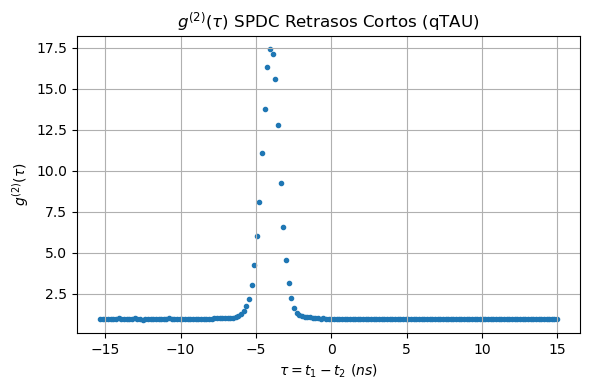

In [103]:
plt.figure(figsize=(6, 4))
plt.scatter(
    SPDC_G2["tau (s) - HBT Measurement"] * 1e9,
    SPDC_G2["g^(2)(tau) - HBT Measurement"],
    marker="."
)

plt.xlabel(r"$\tau = t_1 - t_2\ (ns)$")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.title(r"$g^{(2)}(\tau)$ SPDC Retrasos Cortos (qTAU)")

plt.grid(True)
plt.tight_layout()

plt.savefig("g2_SPDC_Retrasos_Cortos_qTAU.pdf", format="pdf", bbox_inches="tight")
plt.show()

PSEUDOTÉRMICA

In [29]:
CanalA, CanalB, CanalC, CoinAB, CoinAC, CoinBC, CoinABC = TDMS_File("termica_FPGA_100ms_cortos_3.25V.tdms")

Canal A
Canal B
Canal C
Coincidencias AB
Coincidencias AC
Coincidencias BC
Coincidencias ABC


In [31]:
coin_cortos = CoinAB.to_numpy()
channelA_cortos = CanalA.to_numpy()
channelB_cortos = CanalB.to_numpy()

g2_term_cortos = []

for i in range(len(coin_cortos)):
    g2_term_cortos.append(coin_cortos[i]/(taus_cortos*channelA_cortos[i]*channelB_cortos[i]))

g2_term_cortos = np.array(g2_term_cortos)
g2_term_mean = g2_term_cortos.mean(axis=0)
g2_term_std = g2_term_cortos.std(axis=0)

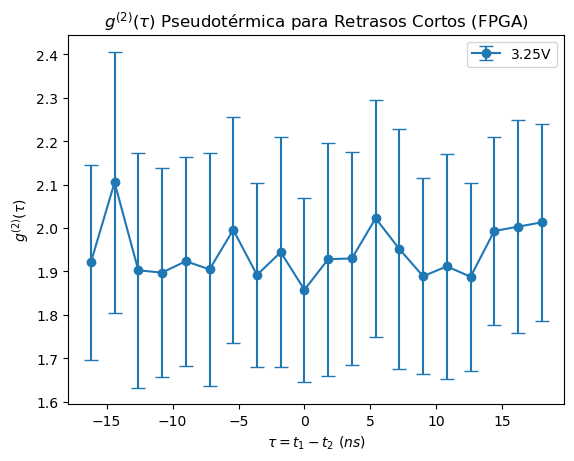

In [99]:
taus = np.arange(-9,11,1)*1.8
plt.errorbar(taus, g2_term_mean, label="3.25V",marker='o',yerr=g2_term_std,capsize=5)
plt.xlabel(r"$\tau = t_1 - t_2\ (ns)$")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.title(r"$g^{(2)}(\tau)$ Pseudotérmica para Retrasos Cortos (FPGA)")
plt.savefig("Pseudotérmica_para_Retrasos_Cortos_(FPGA).png",format="png")
plt.legend()

In [59]:
Datos1 = TDMS_File("termica_FPGA_100ms_largos_3.25V_2.tdms")[0]

Datos


In [61]:
taus_term = np.arange(-10, 11, 1)*10

coin1 = Datos1.drop(['Canal A', 'Canal B'], axis=1).to_numpy()
channelA1 = Datos1["Canal A"].to_numpy()
channelB1 = Datos1["Canal B"].to_numpy()

g2_term1 = []

for i in range(len(coin1)):
    g2_term1.append(coin1[i]/(taus_largos*channelA1[i]*channelB1[i]))

g2_term1 = np.array(g2_term1)
g2_term1_mean = g2_term1.mean(axis=0)
g2_term1_std = g2_term1.std(axis=0)

In [63]:
Datos2 = TDMS_File("termica_FPGA_100ms_largos_0.75V.tdms")[0]

Datos


In [65]:
coin2 = Datos2.drop(['Canal A', 'Canal B'], axis=1).to_numpy()
channelA2 = Datos2["Canal A"].to_numpy()
channelB2 = Datos2["Canal B"].to_numpy()

g2_term2 = []

for i in range(len(coin2)):
    g2_term2.append(coin2[i]/(taus_largos*channelA2[i]*channelB2[i]))

taus_term
g2_term2 = np.array(g2_term2)
g2_term2_mean = g2_term2.mean(axis=0)
g2_term2_std = g2_term2.std(axis=0)

In [67]:
Datos3 = TDMS_File("termica_FPGA_100ms_largos_1V.tdms")[0]

Datos


In [69]:
coin3 = Datos3.drop(['Canal A', 'Canal B'], axis=1).to_numpy()
channelA3 = Datos3["Canal A"].to_numpy()
channelB3 = Datos3["Canal B"].to_numpy()

g2_term3 = []

for i in range(len(coin3)):
    g2_term3.append(coin3[i]/(taus_largos*channelA3[i]*channelB3[i]))

g2_term3 = np.array(g2_term3)
g2_term3_mean = g2_term3.mean(axis=0)
g2_term3_std = g2_term3.std(axis=0)

In [71]:
Datos4 = TDMS_File("termica_FPGA_100ms_largos_5V.tdms")[0]

Datos


In [73]:
coin4 = Datos4.drop(['Canal A', 'Canal B'], axis=1).to_numpy()
channelA4 = Datos4["Canal A"].to_numpy()
channelB4 = Datos4["Canal B"].to_numpy()

g2_term4 = []

for i in range(len(coin4)):
    g2_term4.append(coin4[i]/(taus_largos*channelA4[i]*channelB4[i]))

g2_term4 = np.array(g2_term4)
g2_term4_mean = g2_term4.mean(axis=0)
g2_term4_std = g2_term4.std(axis=0)

In [75]:
Datos5 = TDMS_File("termica_FPGA_100ms_largos_10V.tdms")[0]

Datos


In [77]:
coin5 = Datos5.drop(['Canal A', 'Canal B'], axis=1).to_numpy()
channelA5 = Datos5["Canal A"].to_numpy()
channelB5 = Datos5["Canal B"].to_numpy()

g2_term5 = []

for i in range(len(coin5)):
    g2_term5.append(coin5[i]/(taus_largos*channelA5[i]*channelB5[i]))

g2_term5 = np.array(g2_term5)
g2_term5_mean = g2_term5.mean(axis=0)
g2_term5_std = g2_term5.std(axis=0)

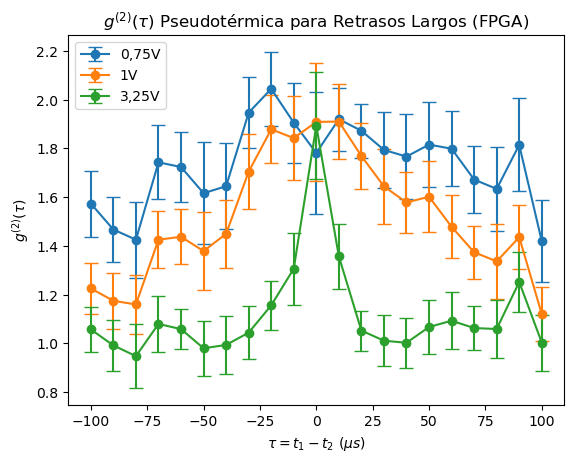

In [79]:
plt.title(r"$g^{(2)}(\tau)$ Pseudotérmica para Retrasos Largos (FPGA)")
plt.errorbar(taus_term, g2_term2_mean, label="0,75V",marker='o',yerr=g2_term2_std,capsize=5)
plt.errorbar(taus_term, g2_term3_mean, label="1V",marker='o',yerr=g2_term3_std,capsize=5)
plt.errorbar(taus_term, g2_term1_mean, label="3,25V",marker='o',yerr=g2_term1_std,capsize=5)
#plt.errorbar(taus_term, g2_term4_mean, label="5V",marker='o',yerr=g2_term4_std,capsize=5)
#plt.errorbar(taus_term, g2_term5_mean, label="10V",marker='o',yerr=g2_term5_std,capsize=5)
plt.xlabel(r"$\tau = t_1 - t_2\ (\mu s)$")
plt.ylabel(r"$g^{(2)}(\tau)$")
plt.legend()

plt.savefig("Pseudotérmica_para_Retrasos_Largos_(FPGA).png",format="png")

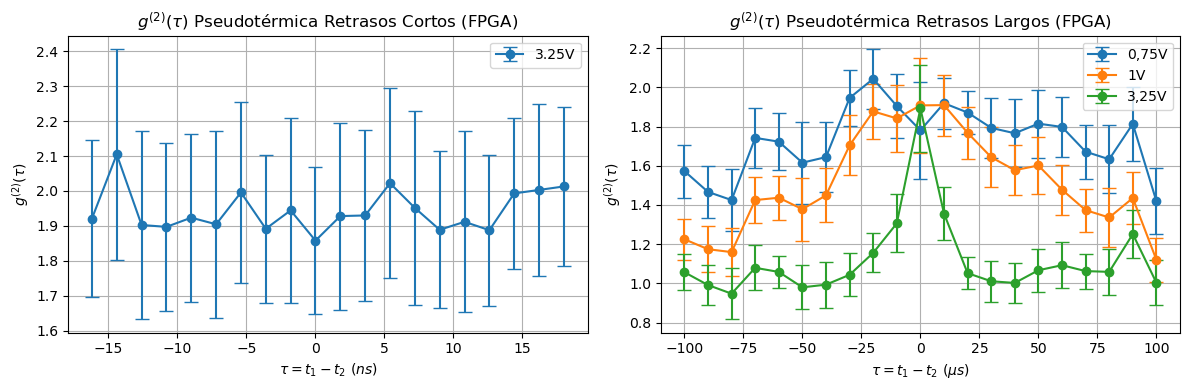

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Altura un poco mayor para legibilidad

# Primer gráfico: Retrasos cortos
ax1.errorbar(taus, g2_term_mean, label="3.25V", marker='o', yerr=g2_term_std, capsize=5)
ax1.set_xlabel(r"$\tau = t_1 - t_2\ (ns)$")
ax1.set_ylabel(r"$g^{(2)}(\tau)$")
ax1.set_title(r"$g^{(2)}(\tau)$ Pseudotérmica Retrasos Cortos (FPGA)")
ax1.legend()
ax1.grid(True)

# Segundo gráfico: Retrasos largos
ax2.errorbar(taus_term, g2_term2_mean, label="0,75V", marker='o', yerr=g2_term2_std, capsize=5)
ax2.errorbar(taus_term, g2_term3_mean, label="1V", marker='o', yerr=g2_term3_std, capsize=5)
ax2.errorbar(taus_term, g2_term1_mean, label="3,25V", marker='o', yerr=g2_term1_std, capsize=5)
# ax2.errorbar(taus_term, g2_term4_mean, label="5V", marker='o', yerr=g2_term4_std, capsize=5)
# ax2.errorbar(taus_term, g2_term5_mean, label="10V", marker='o', yerr=g2_term5_std, capsize=5)
ax2.set_xlabel(r"$\tau = t_1 - t_2\ (\mu s)$")
ax2.set_ylabel(r"$g^{(2)}(\tau)$")
ax2.set_title(r"$g^{(2)}(\tau)$ Pseudotérmica Retrasos Largos (FPGA)")
ax2.legend()
ax2.grid(True)

# Ajuste para evitar superposición
plt.tight_layout()

# Guardar y mostrar
plt.savefig("g2_Pseudotermica_qTAU.pdf", format="pdf", bbox_inches="tight")
plt.show()